In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# prompt: generate code to unzip /content/drive/MyDrive/archive (2).zip this file at /content folder
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/archive.zip"
extract_dir = "/content"

if os.path.exists(zip_file_path):
    try:

        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted '/content/drive/MyDrive/archive.zip' to '/content'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [4]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'


In [5]:
size=224
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [6]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

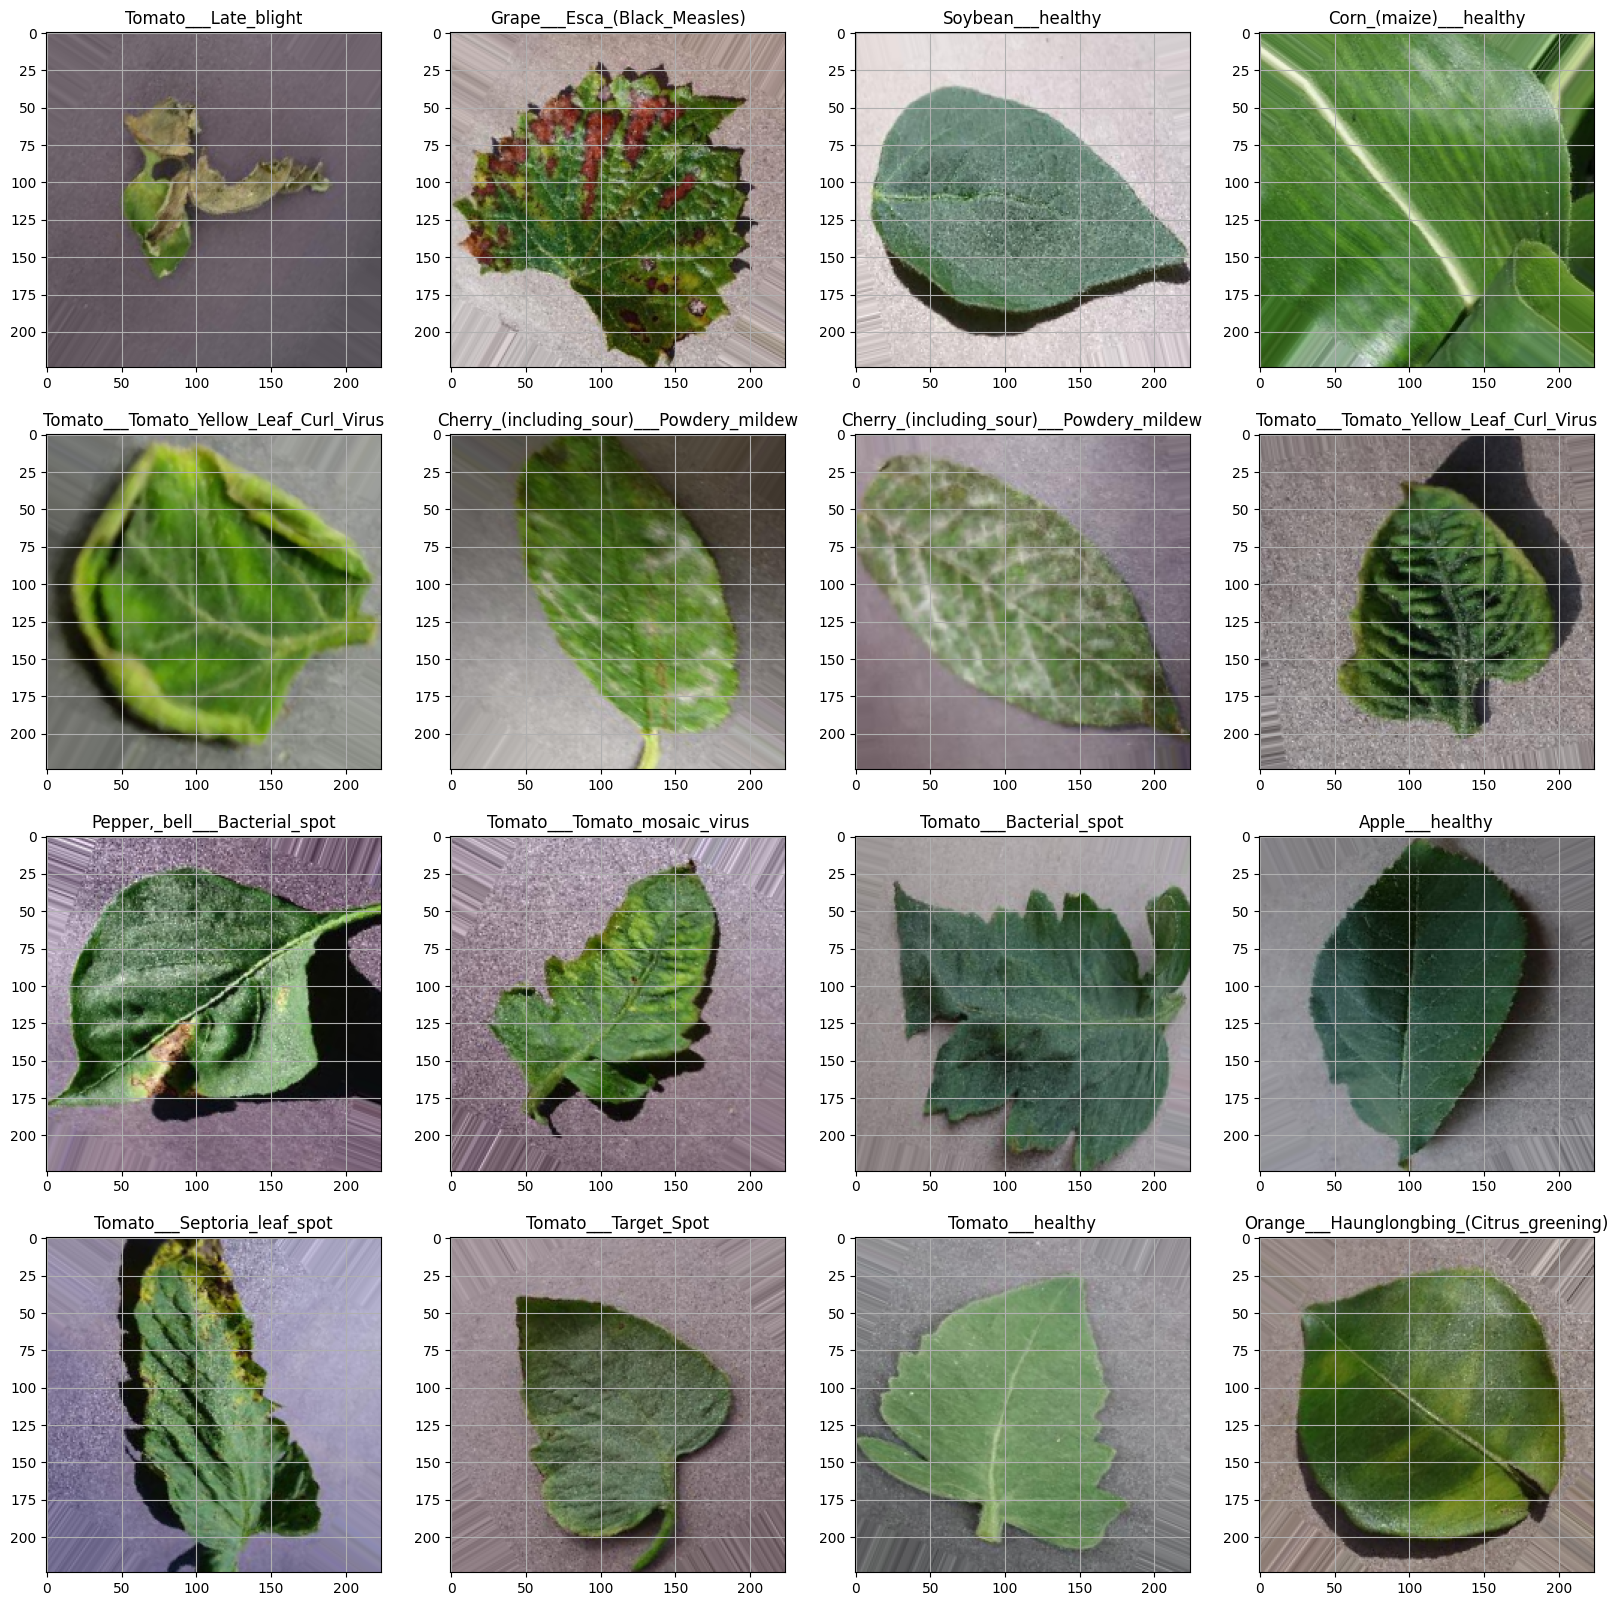

In [7]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [8]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [9]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [10]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [11]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [12]:
from tensorflow import keras

# Initialize a sequential model
model = keras.models.Sequential()

# Convolutional Layer 1
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape=(224, 224, 3)))

# Max Pooling Layer 1
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

# Convolutional Layer 2
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1,
                padding="same", activation="relu", name="Conv2"))

# Convolutional Layer 3
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1,
                padding="same", activation="relu", name="Conv3"))

# Max Pooling Layer 2
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

# Convolutional Layer 4
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                padding="same", activation="relu", name="Conv4"))

# Max Pooling Layer 3
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

# Dropout Layer
model.add(keras.layers.Dropout(0.3, name="Dropout1"))

# Flatten Layer
model.add(keras.layers.Flatten(name="Flatten"))

# Fully Connected Layer 1
model.add(keras.layers.Dense(256, activation="relu", name="Dense1"))

# Dropout Layer
model.add(keras.layers.Dropout(0.4, name="Dropout2"))

# Fully Connected Layer 2
model.add(keras.layers.Dense(128, activation="relu", name="Dense2"))

# Output Layer
model.add(keras.layers.Dense(38, activation="softmax", name="Output"))

# Display the model summary
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,858,342 (98.64 MB)

 Trainable params: 25,858,342 (98.64 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# Display the model summary
model.compile(
    optimizer='adam',                      # Use Adam optimizer
    loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for multi-class classification
    metrics=['accuracy']                  # Monitor accuracy during training
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data Preparation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training Data
train_data = train_datagen.flow_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

# Validation Data
val_data = train_datagen.flow_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


In [17]:
# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

# Save the Model
model.save('plant_disease_model.h5')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 174s 91ms/step - accuracy: 0.3513 - loss: 2.3093 - val_accuracy: 0.7890 - val_loss: 0.6828
Epoch 2/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1758/1758 ━━━━━━━━━━━━━━━━━━━━ 144s 81ms/step - accuracy: 0.7664 - loss: 0.7487 - val_accuracy: 0.8590 - val_loss: 0.4375
Epoch 4/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 197s 81ms/step - accuracy: 0.8453 - loss: 0.4883 - val_accuracy: 0.9018 - val_loss: 0.3078


In [21]:
from tensorflow.keras.models import load_model
# Load the Saved Model
model = load_model('/content/plant_disease_model.h5')

# Recompile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(val_data)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.9093 - loss: 0.2947
Test Loss: 0.30777689814567566, Test Accuracy: 0.9017984867095947


In [25]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Mapping of Class Indices to Class Labels
class_indices = train_data.class_indices
labels_map = {v: k for k, v in class_indices.items()}  # Reverse the mapping

# Function to Format Class Labels
def format_label(label):
    parts = label.split('_')
    category = parts[0].capitalize()  # Capitalize the first word
    description = ' '.join(part.capitalize() for part in parts[1:])  # Capitalize the rest
    return f"{category}: {description}"

# Function for Single Prediction
def single_prediction(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make Prediction
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_label = labels_map[class_index]

    # Format and Print Labels
    original_label = image_path.split('/')[-1].split('.')[0]
    formatted_label = format_label(class_label)

    print(f"Original: {original_label}")
    print(f"Predicted: {formatted_label}")

    return formatted_label

# Example Usage
single_prediction("/content/test/test/AppleCedarRust1.JPG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original: AppleCedarRust1
Predicted: Apple:   Cedar Apple Rust


'Apple:   Cedar Apple Rust'

In [26]:
single_prediction("/content/test/test/TomatoHealthy1.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Original: TomatoHealthy1
Predicted: Tomato:   Healthy


'Tomato:   Healthy'

In [34]:
import pickle
from tensorflow.keras.models import load_model

# Load the Keras model from .h5 file
model = load_model('/content/plant_disease_model.h5')

# Save the model to a .pkl file
with open('plant_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as plant_disease_model.pkl")


Model saved as plant_disease_model.pkl


In [35]:
# Load the Pickle model
with open('plant_disease_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Check the model summary
loaded_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout1 (Dropout)                   │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout2 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,575,028 (295.93 MB)

 Trainable params: 25,858,342 (98.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,716,686 (197.28 MB)